In [130]:
import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('Transfers.csv')
data

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000


Ideen:

1) Auf welcher Position gab es die meisten Transfers?
2) Welcher Verein hat die meisten Spieler verloren?
3) Welcher Verein hat die meisten Spieler gekauft? 
4) Wie viele Spieler haben Ligen bekommen/verloren?
5) Anzahl der Transfers pro Saison
6) (später) KNN Alter/Transfer
7) Ausgegebene Summen pro Saison
8) Welcher Verein hat in der jeweiligen Liga die meisten Transfers?
9) Welcher Verein hat die meisten Spieler an einen Verein verloren bzw. gekauft?
10) Welcher Spieler wechselte am häufigsten
11) Welche Liga hat die meisten 

In [12]:
cols = data.columns
for col in cols:
    print(f'Number of missing values in Column {col}: {data[col].isnull().sum()}')

Number of missing values in Column Name: 0
Number of missing values in Column Position: 0
Number of missing values in Column Age: 0
Number of missing values in Column Team_from: 0
Number of missing values in Column League_from: 0
Number of missing values in Column Team_to: 0
Number of missing values in Column League_to: 0
Number of missing values in Column Season: 0
Number of missing values in Column Market_value: 1260
Number of missing values in Column Transfer_fee: 0


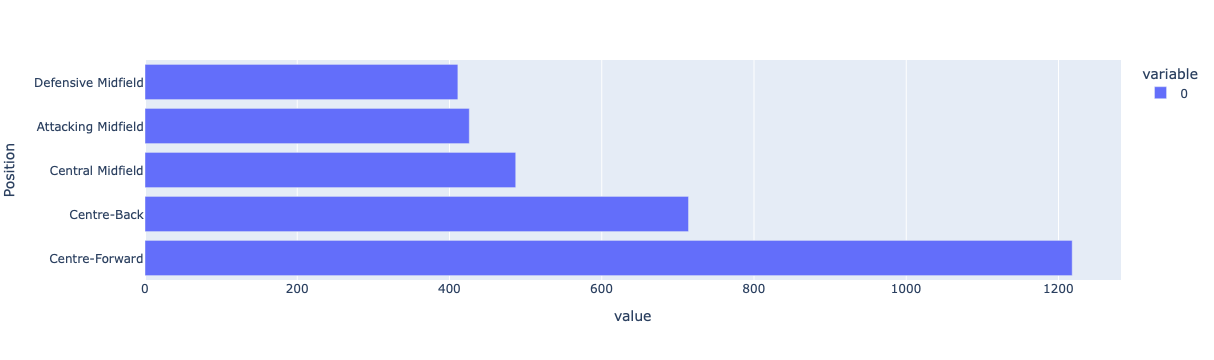

In [56]:
df_pos = data.groupby('Position').size()
df_pos = df_pos.sort_values(ascending=False)


fig = px.bar(df_pos.head(), orientation='h')
fig.show()

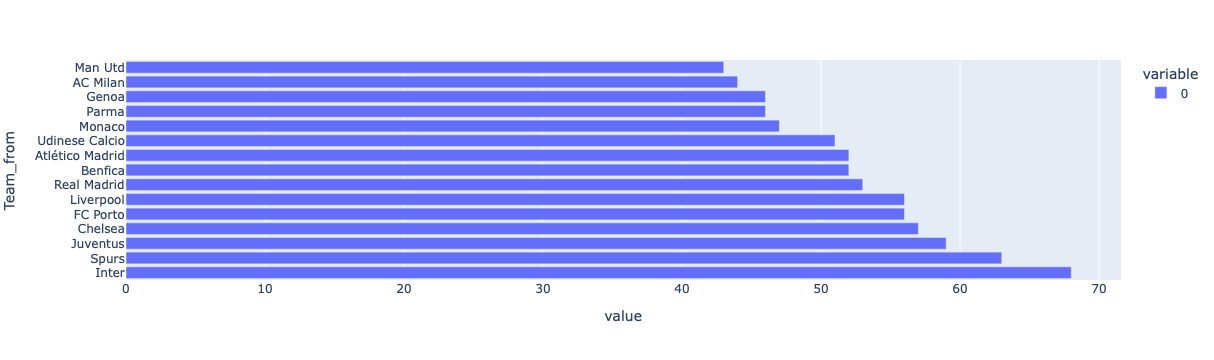

In [66]:
df_home = data.groupby('Team_from').size()
df_home = df_home.sort_values(ascending = False)

fig_home = px.bar(df_home.head(15), orientation='h')
fig_home.show()

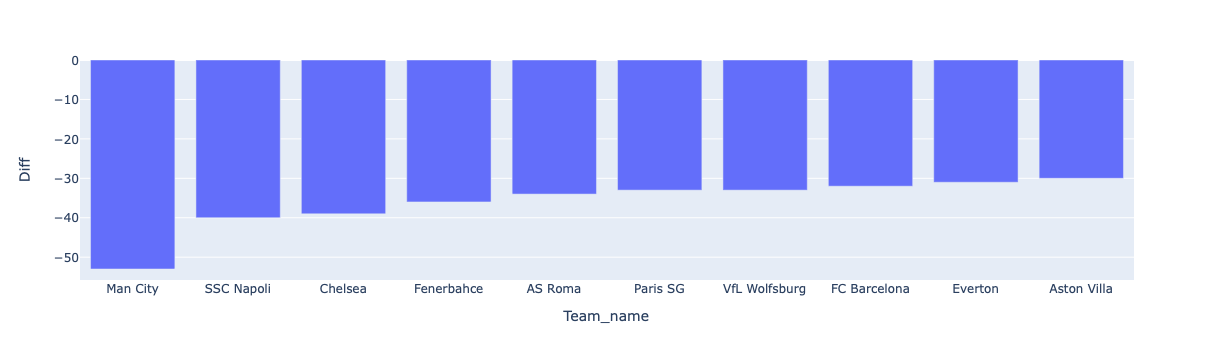

In [146]:
# wie oft kommt ein value in einer Spalte vor 
lol = 'lol'
df_teams = pd.DataFrame(columns=['Team_name','In','Out'])
#print(df_teams)


team_frome = data['Team_from'].unique()
team_to = data['Team_to'].unique()


for value in values:
    temp_tf = data[data['Team_from']==value].shape[0]
    temp_tt = data[data['Team_to']==value].shape[0]
        
    temp = {'Team_name': value,'In': temp_tf, 'Out': temp_tt}
    df_teams = df_teams.append(temp, ignore_index = True)

#ser = pd.Series(test)
#df_teams = df_teams.append(ser, ignore_index=True)


df_teams['Diff'] = df_teams['In'] - df_teams['Out']
df_teams = df_teams.sort_values(by='Diff')

fig = px.bar(df_teams.head(10), x = 'Team_name', y ='Diff')

fig.add_trace(go.Bar(
    x=,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))

fig.show()